In [1]:
from ensemble_forecaster import SimpleEnsembleForecaster
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

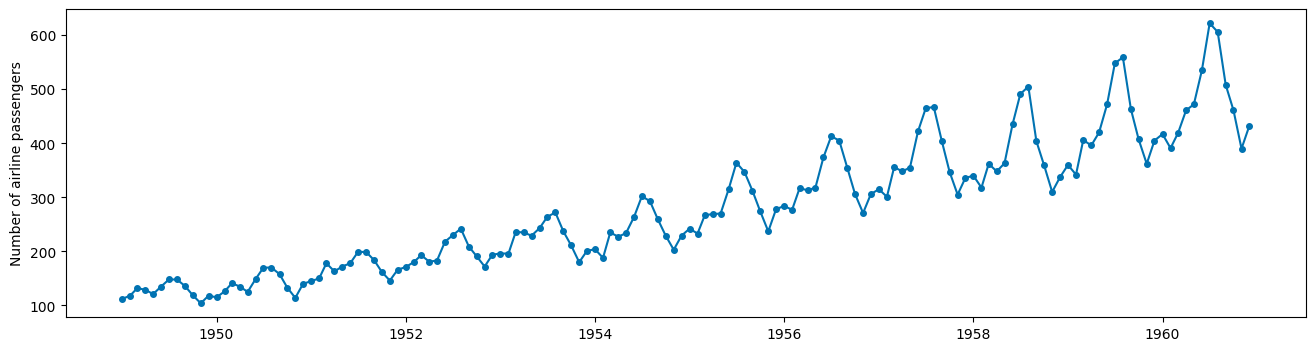

In [2]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [3]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y)

In [10]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

simple_exp_smoothing = ExponentialSmoothing(trend="add", seasonal="add", sp=12)
simple_exp_smoothing.fit(y_train)

model = SimpleEnsembleForecaster(
    [ExponentialSmoothing(trend="add", seasonal="add", sp=12),
     ExponentialSmoothing(seasonal="mul", sp=12)]
)
model.fit(y_train)

SimpleEnsembleForecaster(forecasters=[ExponentialSmoothing(seasonal='add',
                                                           sp=12, trend='add'),
                                      ExponentialSmoothing(seasonal='mul',
                                                           sp=12)])

In [11]:
y_pred_simple = simple_exp_smoothing.predict(y.index)
y_pred = model.predict(y.index)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

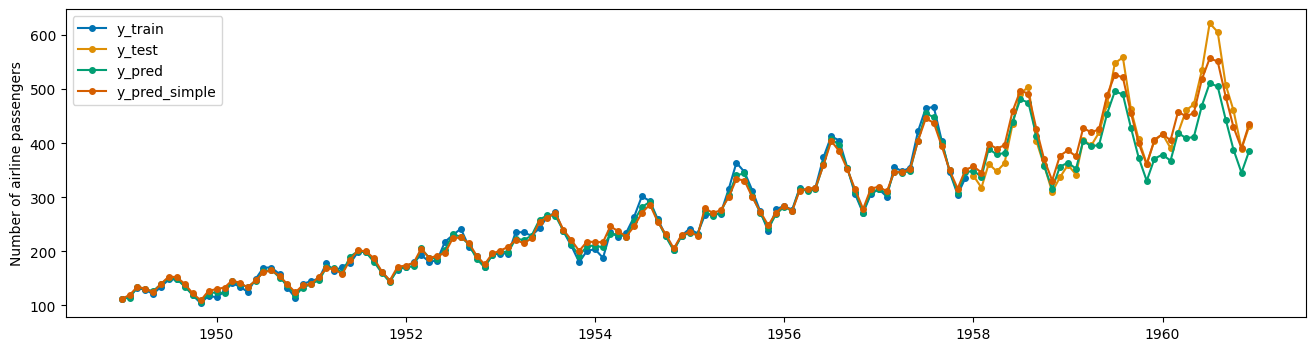

In [12]:
plot_series(y_train, y_test, y_pred, y_pred_simple, labels=["y_train", "y_test", "y_pred", "y_pred_simple"])